In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
from matplotlib.font_manager import FontProperties
from matplotlib import rc
import matplotlib as mpl
import sys
sys.path.append("..")
sys.path.append('/home/claire/Works/exo-top/exotop')
from exotop.model_1D import the_results as plottop
from exotop.model_1D import inputs as ins
from exotop.model_1D import parameters as p
from exotop.model_1D.astroenvironment import radius_zeng, grav 
from exotop.useful_and_bespoke import dark_background, imscatter
import matplotlib.ticker as ticker
import matplotlib.lines as mlines

# set paths
# fig_path = '/space/cmg76/figs/' # office
fig_path = 'figs/' # laptop#
goodfig_path = '../latex/report-firstyr/figs/'
fig_format = '.png'
benchmark_path = '../benchmarks/'
planet_icon_path='/home/claire/Pictures/science-graphics/planet_png/'

# set mpl display parameters
# mpl.rcParams['axes.linewidth'] = 2  # set the value globally - for poster
# rc('font',**{'family':'serif','serif':['Times New Roman']})  # latex font for matplotlib CMU Serif Roman
# # rc('font',**{'family':'monospace','monospace':['Ubuntu Mono']})  # for computery poster 
# rc('text', usetex=True)  # turn on for latexy font
# mpl.font_manager._rebuild()
# plt.style.use('dark_background')

In [32]:
def estimate_h_rel(M1, M2, T1, T2, b=0.151, Tc=2200, a_rh=2.44, Rb=8.3144598, Ea=300e3):
    
    M_ratio = M1/M2
    dT_ratio = (Tc - T1 + (a_rh*Rb/Ea)*T1**2)/(Tc - T2 + (a_rh*Rb/Ea)*T2**2)
    eta_ratio = np.exp(Ea/Rb*(T2**-1 - T1**-1))
    
    print('M_ratio part ', M_ratio**((1 - 4.7*b)/3.7))
    print('other part', ( dT_ratio * eta_ratio )**-b)
    
    h_ratio = M_ratio**((1 - 4.7*b)/3.7) * ( dT_ratio * eta_ratio )**-b
    hprime_ratio = ( M_ratio**(4.7/3.7) * dT_ratio * eta_ratio )**-b
    
    print('\nprime')
    print('M_ratio part', (M_ratio**(4.7/3.7))**-b)
    print('other part', (dT_ratio * eta_ratio)**-b)
    
    print('\nh(M1)/h(M2) =', h_ratio)
    print('h\'(M1)/h\'(M2) =', hprime_ratio)
    
    return h_ratio

ans = estimate_h_rel(M1=1, M2=6, T1=2200, T2=2300, b=0.2)

M_ratio part  0.9713624950769257
other part 1.099464802670365

prime
M_ratio part 1.5764945721894448
other part 1.099464802670365

h(M1)/h(M2) = 1.0679788739711455
h'(M1)/h'(M2) = 1.7333002937231694


(0.0, 6.0)

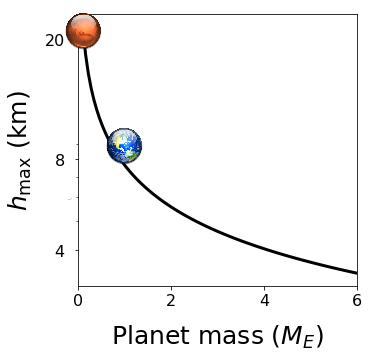

In [46]:
def h_max_stress(M, rho=2700, Y=100e6, CMF=0.3):
    M = M*p.M_E
    R = radius_zeng(M, CMF)*p.R_E
    g = grav(M, R)
    return 2*Y/(rho*g)

M = np.linspace(0.1, 6, num=100)
h_max = h_max_stress(M)

plt.figure(figsize=(5,5))
plt.plot(M, h_max*1e-3, 'k', lw=3)
plt.xlabel('Planet mass ($M_E$)', fontsize=25, labelpad=15)
plt.ylabel('$h_{\mathrm{max}}$ (km)', fontsize=25, labelpad=10)
plt.gca().set_yscale('log')
plt.gca().tick_params(axis='x', labelsize=16)
plt.gca().tick_params(axis='y', which='major', labelsize=16, pad=10)
plt.gca().tick_params(axis='y', which='minor', labelsize=0)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
# plt.gca().yaxis.set_minor_formatter(ticker.FormatStrFormatter('%g'))
# plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
plt.gca().set_yticks([2, 4, 8, 20])


h_Earth = 8.848 
M_Earth = 1

h_Mars = 21.287
M_Mars = 0.107

imscatter(M_Earth, h_Earth, planet_icon_path + 'Earth.png', zoom=0.08, ax=plt.gca())
imscatter(M_Mars, h_Mars, planet_icon_path + 'Mars.png', zoom=0.08, ax=plt.gca())

plt.xlim(0, 6)


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'postprocessors': ['topography']}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000007, 150000.00000072, 150000.00000722,
       150000.00007223, 150000.00072231, 150000.0072231 , 150000.07223082,
       150000.72228758, 150007.22081438, 150072.00221653, 150699.64504212,
       155148.93395302, 153384.29118103, 137658.20032941, 116981.41431711,
        98004.77842526,  84006.40133971,  74661.33759524,  68327.33286672,
        63816.64567557,  60550.16605877,  58171.45516626,  56406.63826482,
        55056.18380746,  53993.64148486,  53151.9614025 ,  52494.


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000014, 150000.00000139, 150000.0000139 ,
       150000.00013905, 150000.00139049, 150000.01390485, 150000.13904819,
       150001.39045   , 150013.90131098, 150138.6946382 , 151355.51735527,
       160768.53680165, 167983.94276286, 157011.45847247, 140235.9507334 ,
       124757.71494726, 113465.39018042, 106298.01746137, 102056.04756395,
        996

   H_0: 2.265771894e-11
   H_f: 4.6e-12

recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000007, 150000.00000071, 150000.00000712,
       150000.0000712 , 150000.00071203, 150000.00712029, 150000.07120267,
       150000.71200623, 150007.11801445, 150070.97557726, 150689.51245555,
       155059.16202916, 153131.97120487, 137322.39540247, 116614.15939323,
        97643.67845349,  83665.26210186,  7433


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000006, 150000.00000062, 150000.00000623,
       150000.00006234, 150000.00062337, 150000.00623367, 150000.06233647,
       150000.62334538, 150006.23152096, 150062.12212461, 150602.10791731,
       154282.95326653, 150941.01681261, 134410.90484691, 113459.76480815,
        94590.49660652,  80824.75634669,  71611.45945099,  65273.84296417,
        606


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000005, 150000.00000049, 150000.0000049 ,
       150000.00004898, 150000.00048979, 150000.00489793, 150000.04897908,
       150000.4897731 , 150004.89596422, 150048.78313619, 150470.35081251,
       153107.6646657 , 147600.81421209, 129994.60016267, 108773.69584653,
        90201.33121808,  76865.7563504 ,  67802.15720157,  61430.78008593,
        567


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000004, 150000.00000039, 150000.00000389,
       150000.0000389 , 150000.000389  , 150000.00388997, 150000.03889957,
       150000.3889792 , 150003.8881458 , 150038.71699341, 150370.87628346,
       152217.10548544, 145059.87262118, 126660.74017155, 105313.69901409,
        87061.61255184,  74112.24952799,  65190.3977576 ,  58850.54989677,
        543


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000003, 150000.00000031, 150000.00000307,
       150000.00003074, 150000.00030738, 150000.00307376, 150000.03073745,
       150000.30735897, 150003.07203872, 150030.56542845, 150290.29824443,
       151494.12532865, 142995.00637517, 123972.19990115, 102572.28814542,
        84629.68325586,  72019.47481577,  63224.83432917,  56960.12346783,
        524


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000002, 150000.00000024, 150000.00000238,
       150000.00002384, 150000.00023844, 150000.00238442, 150000.02384402,
       150000.23842548, 150002.38278272, 150023.68074861, 150222.22916164,
       150882.46998864, 141248.63718737, 121715.06244127, 100304.89801483,
        82653.22750898,  70243.41199619,  61621.54826052,  55501.56745472,
        509


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000002, 150000.00000018, 150000.00000179,
       150000.00001786, 150000.00017857, 150000.00178568, 150000.01785668,
       150000.17855275, 150001.784123  , 150017.70089761, 150163.09679982,
       150350.54791895, 139731.41953133, 119767.83564636,  98374.20976553,
        80994.07641921,  68787.02706527,  60318.96551378,  54279.40944402,
        497


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000001, 150000.00000013, 150000.00000126,
       150000.00001255, 150000.00012551, 150000.00125513, 150000.01255117,
       150000.12549824, 150001.25363704, 150012.40194678, 150110.69101215,
       149878.75415407, 138387.54068434, 118054.5798864 ,  96695.19612946,
        79568.36808502,  67554.72324041,  59249.47213708,  53286.23563428,
        486

   H_f: 4.6e-12

recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000001, 150000.00000008, 150000.00000078,
       150000.00000778, 150000.00007779, 150000.00077788, 150000.00777865,
       150000.0777736 , 150000.77644331, 150007.63527354, 150063.54452428,
       149454.04303263, 137179.68260883, 116524.522036  ,  95211.47183299,
        78321.41013449,  66482.91706092,  58288.24286524,  52374.38448


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000001, 150000.00000006, 150000.00000056,
       150000.00000556, 150000.00005559, 150000.00055586, 150000.0055585 ,
       150000.05557234, 150000.55445511, 150005.41782476, 150041.61058947,
       149256.37836208, 136618.25132335, 115816.61849049,  94530.07511621,
        77752.73786182,  65995.81104461,  57854.46731606,  51948.53819217,
        473


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000012, 150000.00000115, 150000.0000115 ,
       150000.00011501, 150000.00115014, 150000.01150135, 150000.11501332,
       150001.15011246, 150011.49904788, 150114.78305444, 151127.32842694,
       159431.3653031 , 170109.67652896, 166429.60149976, 155252.80939177,
       141120.60431077, 127232.50668908, 115445.60167003, 106318.06976311,
        995


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.0000001 , 150000.00000104, 150000.00001043,
       150000.00010434, 150000.0010434 , 150000.010434  , 150000.10433978,
       150001.04337695, 150010.43168141, 150104.10824515, 151020.46076922,
       158347.24181144, 165741.89899221, 158710.89705507, 144612.19085159,
       128512.28639801, 113867.75895264, 102305.02471377,  93843.27082182,
        877


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000009, 150000.00000094, 150000.00000937,
       150000.00009367, 150000.00093666, 150000.00936665, 150000.09366625,
       150000.93664155, 150009.36432617, 150093.4345575 , 150913.70464948,
       157273.66658651, 161507.78145918, 151366.54653101, 134728.60559822,
       117199.31570866, 102367.64445522,  91398.77104971,  83692.88521286,
        782


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000008, 150000.00000083, 150000.0000083 ,
       150000.00008299, 150000.00082993, 150000.00829929, 150000.08299271,
       150000.82990627, 150008.29698215, 150082.76199133, 150807.05991837,
       156210.5005889 , 157401.29594819, 144373.70714713, 125554.62883553,
       107084.41673504,  92507.66332485,  82319.06166136,  75335.7168824 ,
        703


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000007, 150000.00000072, 150000.00000723,
       150000.00007232, 150000.00072319, 150000.00723194, 150000.07231917,
       150000.7231711 , 150007.22964936, 150072.09054649, 150700.52642681,
       155157.60696327, 153416.77976664, 137712.01381418, 117049.13442732,
        98074.99615437,  84070.87490892,  74718.89126022,  68379.87537616,
        638


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000006, 150000.00000062, 150000.00000616,
       150000.00006165, 150000.00061646, 150000.00616458, 150000.06164564,
       150000.61643604, 150006.16232778, 150061.42022284, 150594.10402594,
       154114.85099922, 149548.91458002, 131363.32122357, 109175.85394567,
        90080.42359429,  76857.53432836,  68327.08349895,  62458.56094795,
        582


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000005, 150000.00000051, 150000.0000051 ,
       150000.00005097, 150000.00050972, 150000.00509723, 150000.0509721 ,
       150000.5097011 , 150005.09501743, 150050.75102022, 150487.79256716,
       153082.1000929 , 145792.70691062, 125311.46704853, 101902.08098571,
        83011.83039319,  70701.78454811,  62694.83610798,  57313.05898501,
        535


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000004, 150000.0000004 , 150000.00000403,
       150000.0000403 , 150000.00040299, 150000.00402988, 150000.04029857,
       150000.40296626, 150004.0277183 , 150040.08293848, 150381.59190208,
       152059.22370938, 142143.46994294, 119542.05302088,  95197.55938713,
        76785.91848117,  65173.43106046,  57916.66156774,  53134.39009227,
        495


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000003, 150000.0000003 , 150000.00000296,
       150000.00002963, 150000.00029625, 150000.00296252, 150000.02962504,
       150000.29623154, 150002.96043039, 150029.41597747, 150275.50188256,
       151046.09334578, 138596.8065264 , 114042.24128442,  89033.62959361,
        71337.05539917,  60499.82950694,  53907.58934293,  49275.80337411,
        461


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000002, 150000.00000019, 150000.0000019 ,
       150000.00001895, 150000.00018952, 150000.00189517, 150000.01895151,
       150000.18949693, 150001.89315371, 150018.75013704, 150169.52236072,
       150042.58249498, 135148.59327976, 108800.5640833 ,  83382.77286036,
        66322.74948124,  56462.25439812,  50223.09156099,  46146.5602139 ,
        431


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.1
pl.CRF = 0.31622776601683794
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000008, 150000.00000077, 150000.00000773,
       150000.00007734, 150000.00077343, 150000.00773428, 150000.07734266,
       150000.77340911, 150007.73233729, 150077.14818598, 150754.15350229,
       155976.33103576, 159171.12905323, 150208.84577022, 135259.74215773,
       118598.95532408, 103283.71257206,  90860.10957402,  81405.88380242,
        74


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.1631578947368421
pl.CRF = 0.4039280811442083
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000008, 150000.00000076, 150000.00000758,
       150000.00007577, 150000.00075765, 150000.00757654, 150000.07576524,
       150000.75763412, 150007.57451225, 150075.5624305 , 150737.55141827,
       155741.19178205, 157619.2073112 , 146838.22242833, 130196.84679713,
       112571.0136663 ,  97264.66439955,  85532.74290419,  76963.328071


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.22631578947368422
pl.CRF = 0.4757265910937544
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000007, 150000.00000074, 150000.00000742,
       150000.00007415, 150000.00074154, 150000.00741545, 150000.07415426,
       150000.74152338, 150007.41331152, 150073.94109752, 150720.41315647,
       155484.13006411, 155837.25599206, 142964.51961481, 124506.75312945,
       106079.53680991,  91125.43107656,  80353.95788773,  72779.54781


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.2894736842105263
pl.CRF = 0.5380275868489703
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000007, 150000.00000073, 150000.00000725,
       150000.00007251, 150000.00072509, 150000.00725088, 150000.07250856,
       150000.72506523, 150007.24861317, 150072.28243136, 150702.66800448,
       155199.5615543 , 153763.89477629, 138475.93496615, 118118.76321641,
        99185.79558649,  85011.27974194,  75445.2312613 ,  68931.267886


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3526315789473684
pl.CRF = 0.5938279034765614
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000007, 150000.00000071, 150000.00000708,
       150000.00007083, 150000.00070827, 150000.00708272, 150000.07082693,
       150000.70824744, 150007.08028684, 150070.58433774, 150684.21664712,
       154879.30640624, 151310.63667269, 133223.35108822, 110968.59723546,
        92005.23291938,  79094.42257031,  70917.82325141,  65468.128535


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.4157894736842105
pl.CRF = 0.6448173956122853
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000007, 150000.00000069, 150000.00000691,
       150000.00006911, 150000.00069108, 150000.00691083, 150000.06910809,
       150000.69105712, 150006.90819177, 150068.84421708, 150664.91493119,
       154511.09853225, 148348.15598768, 127012.91777047, 103028.44329896,
        84734.78820817,  73569.88278069,  66828.251295  ,  62403.710851

pl.init_derived = <bound method TerrestrialPlanet.init_derived of <exotop.model_1D.terrestrialplanet.TerrestrialPlanet object at 0x7f133c2b0f70>>
pl.k_lm = 4
pl.k_m = 3
pl.kappa_m = 7.575757575757576e-07
pl.lambda_n = [4.924777866504423e-18, 3.119958615357315e-17, 1.5688933885973585e-18, 1.743214978325348e-17]
pl.m_rh = 2.5
pl.mu = 80000000000.0
pl.nondimensionalise = <bound method TerrestrialPlanet.nondimensionalise of <exotop.model_1D.terrestrialplanet.TerrestrialPlanet object at 0x7f133c2b0f70>>
pl.p_n = [9.513e-05, 0.00056847, 2.63e-05, 2.847e-05]
pl.q_core = 0.053457615159038144
pl.q_out = 344.83571003243986
pl.q_sfc = 0.06546983314489573
pl.q_ubl = 0.06558367153647826
pl.rho_c = 7200
pl.rho_m = 3300
pl.set_attrs = <bound method TerrestrialPlanet.set_attrs of <exotop.model_1D.terrestrialplanet.TerrestrialPlanet object at 0x7f133c2b0f70>>
pl.sma = 1
pl.t = array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.11110000e+00, 1.11111000e+01, 1

       1.33591553e+17, 1.36747313e+17, 1.39903073e+17, 1.42009200e+17]), 'R_l': 6019896.109395055, 'd_m': 1534724.8331764536, 'M_lid': 1.0917146478764243e+23, 'M_conv': 2.62537590363341e+24, 'h_rad_m': 4.599999999144803e-12, 'a0': 1.517999999717785e-08, 'H_rad_m': 12076729154468.475, 'H_rad_lid': 502188737929.7921, 'T_l': 1828.9494983965587, 'dT_rh': 309.13916654269303, 'dT_m': 372.1504028013883, 'eta_s': 2.0803576775398164e+67, 'eta_l': 5.927224038102584e+19, 'eta_m': 3.420267520830618e+18, 'eta_cmb': 2.6769004767720827e+18, 'delta_eta': 9.10768438802371e+47, 'Ra_i_eff': 552065572.6068561, 'Ra_i': 3270008408.7518206, 'delta_rh': 14336.3238656488, 'q_ubl': 0.06469004943800553, 'Q_ubl': 29459497841794.855, 'Ra_crit_c': 19.1856302759297, 'TBL_c': 4615.474671686324, 'q_core': 0.05460867255559928, 'Q_core': 13804781850631.148, 'Ra_F': 41447581893.203125, 'q_sfc': 0.06454260108359566, 'Q_sfc': 30097523918640.207, 'urey': 0.41793862931720455, 'T_avg': 2074.829330878583}
pl.__dir__ = <built-i


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.6052631578947368
pl.CRF = 0.7779866052154991
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000006, 150000.00000064, 150000.00000637,
       150000.00006371, 150000.00063715, 150000.00637149, 150000.06371456,
       150000.63711089, 150006.3676345 , 150063.32924471, 150598.92002429,
       152855.03229495, 133858.19843997, 100080.17522899,  76137.41561293,
        65430.09566349,  60729.02911872,  58254.98500196,  56863.698826


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.6684210526315789
pl.CRF = 0.8175702126616275
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000006, 150000.00000062, 150000.00000618,
       150000.00006183, 150000.00061833, 150000.00618332, 150000.06183277,
       150000.61828548, 150006.17863471, 150061.36474624, 150571.88875338,
       151909.80569942, 125412.58064815,  87709.29027896,  67919.33094056,
        61043.04333446,  58245.13269206,  56917.79171013,  56354.099777


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       149999.99999996, 149999.99999957, 149999.99999572, 149999.99995722,
       149999.99957223, 149999.99572229, 149999.95722288, 149999.57222882,
       149995.72229489, 149957.22361549, 149572.30341392, 145730.37021378,
       108744.90455383,  44933.99019729,  35576.63653836,  31254.79474799,
        28724.67289091,  27217.85307811,  26342.58391696,  25768.52286466,
        255


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       149999.99999997, 149999.99999965, 149999.99999653, 149999.99996528,
       149999.99965279, 149999.99652795, 149999.96527947, 149999.65279471,
       149996.5279508 , 149965.27987903, 149652.83629508, 146532.51786316,
       116193.7772033 ,  54218.76293075,  40883.76464415,  35513.50038284,
        32330.6410567 ,  30316.42651576,  29118.37605492,  28285.70542588,
        278


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       149999.99999997, 149999.99999972, 149999.99999725, 149999.99997247,
       149999.99972468, 149999.99724679, 149999.9724679 , 149999.72467901,
       149997.24679082, 149972.4679829 , 149724.68755692, 147247.91068918,
       122869.09044168,  65565.14143057,  47261.11799844,  40422.98357247,
        36395.30388843,  33885.70952832,  32245.12188598,  31198.27763257,
        304


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       149999.99999998, 149999.99999979, 149999.99999789, 149999.99997889,
       149999.9997889 , 149999.99788896, 149999.97888963, 149999.78889627,
       149997.88896052, 149978.88938412, 149788.87190471, 147886.69542432,
       128846.90948426,  78055.55607496,  55075.66083957,  46182.77942961,
        41154.19912938,  37913.01268119,  35742.89524568,  34336.45328902,
        334


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       149999.99999999, 149999.9999999 , 149999.99999898, 149999.99998978,
       149999.9998978 , 149999.99897804, 149999.98978043, 149999.89780424,
       149998.97803436, 149989.77953784, 149897.71489381, 148969.19412844,
       138992.7899628 , 104052.72299762,  76144.08598396,  60905.94843395,
        52772.15503503,  47812.48780291,  44346.76270862,  41987.19869705,
        403


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 149999.99999999, 149999.99999985, 149999.99999855,
       149999.99998549, 149999.99985488, 149999.99854883, 149999.98548819,
       149999.85486816, 149998.54730589, 149985.33559959, 149839.72325847,
       147141.29035174, 128079.10092632, 102977.47499235,  82105.93458581,
        68808.58528536,  60742.88397254,  55516.97397163,  51907.7189896 ,
        491


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000006, 150000.00000057, 150000.00000566,
       150000.0000566 , 150000.00056599, 150000.0056599 , 150000.05659882,
       150000.56596891, 150005.65776226, 150056.38513154, 150544.79251848,
       153711.76954851, 148758.77525157, 130944.04719905, 109585.48453754,
        91316.99314216,  78590.68785552,  70282.42241847,  64602.12932275,
        605

        69750.23627459,  70817.5753679 ,  71911.78511259,  72656.16813898])
pl.Ea = 307894.7368421053
pl.H_0 = 2.265771894e-11
pl.H_f = 4.6e-12
pl.H_rad_lid = 564027968479.0236
pl.H_rad_m = 18665812027945.914
pl.K_0 = 0.000117
pl.L = 1
pl.M_c = 1.7916e+24
pl.M_conv = 4.0577852242208953e+24
pl.M_lid = 1.2261477577910507e+23
pl.M_m = 4.1804e+24
pl.M_p = 5.972e+24
pl.Q_core = 5411524057611.429
pl.Q_sfc = 34164967724720.87
pl.Q_ubl = 33372758290111.605
pl.R_c = 3513967.1967624715
pl.R_c0 = None
pl.R_l = 6342940.831861026
pl.R_p = 6415597.000000001
pl.R_p0 = None
pl.Ra_F = 296487912604.0184
pl.Ra_crit_c = 27.94736411996596
pl.Ra_crit_u = 450
pl.Ra_i = 19176156817.508167
pl.Ra_i_eff = 3310687581.3927307
pl.SA_c = 155169110302694.7
pl.SA_p = 517230367675649.06
pl.TBL_c = 5427.502049016132
pl.T_avg = 2158.633737371118
pl.T_c = array([2250.        , 2250.        , 2250.        , 2250.        ,
       2250.        , 2250.        , 2250.        , 2250.        ,
       2250.        , 2250.        

       2269.87619568, 2263.39123586, 2256.95695603, 2252.69462893])
pl.T_ref = 1600
pl.T_s = 279.25907404259186
pl.Th_0 = 1
pl.U_0_235 = 0.0072
pl.U_0_238 = 0.9927
pl.V_rh = 6e-06
pl.X_K = 250
pl.X_Th = 0.07
pl.X_U = 0.02
pl.__class__ = <class 'exotop.model_1D.terrestrialplanet.TerrestrialPlanet'>
pl.__delattr__ = <method-wrapper '__delattr__' of TerrestrialPlanet object at 0x7f133c264b50>
pl.__dict__ = {'M_p': 5.972e+24, 'sma': 1, 'L': 1, 'Alb': 0, 'Th_0': 1, 'R_p0': None, 'R_c0': None, 'T_s': 279.25907404259186, 'CMF': 0.3, 'rho_c': 7200, 'rho_m': 3300, 'Ra_crit_u': 450, 'beta_u': 0.3333333333333333, 'beta_c': 0.3333333333333333, 'c_m': 1200, 'c_c': 7800, 'alpha_m': 3e-05, 'k_m': 3, 'k_lm': 4, 'lambda_n': [4.924777866504423e-18, 3.119958615357315e-17, 1.5688933885973585e-18, 1.743214978325348e-17], 'p_n': [9.513e-05, 0.00056847, 2.63e-05, 2.847e-05], 'K_0': 0.000117, 'U_0_235': 0.0072, 'U_0_238': 0.9927, 'X_K': 250, 'X_U': 0.02, 'X_Th': 0.07, 'H_f': 4.6e-12, 'H_0': 2.265771894e-11, '


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000002, 150000.00000022, 150000.00000221, 150000.00002206,
       150000.00022059, 150000.00220593, 150000.02205925, 150000.22059216,
       150002.20588454, 150022.05514261, 150220.18181016, 152165.50666405,
       168552.4978871 , 196992.07350954, 205657.73893107, 202967.47532766,
       193140.09333603, 179109.65618666, 163281.83770238, 147652.59747138,
       1336


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'Ra', 'c': '#d88868', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000003, 150000.00000027, 150000.00000266, 150000.0000266 ,
       150000.00026599, 150000.00265988, 150000.02659879, 150000.26598749,
       150002.65983081, 150026.59390264, 150265.49938564, 152611.91039083,
       172510.69964162, 209519.57140287, 225788.19169978, 230484.15642625,
       227626.93039254, 219618.26933851, 208239.02765013, 194985.28969241,
       1811


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000014, 150000.00000139, 150000.0000139 ,
       150000.00013905, 150000.00139049, 150000.01390485, 150000.13904819,
       150001.39045   , 150013.90131098, 150138.6946382 , 151355.51735527,
       160768.53680165, 167983.94276286, 157011.45847247, 140235.9507334 ,
       124757.71494726, 113465.39018042, 106298.01746137, 102056.04756395,
    

       1.33591553e+17, 1.36747313e+17, 1.39903073e+17, 1.42009200e+17]), 'R_l': 5797627.186603218, 'd_m': 2580928.390179135, 'M_lid': 1.0623428109337825e+23, 'M_conv': 2.9080541399592534e+24, 'h_rad_m': 4.599999999144803e-12, 'a0': 1.517999999717785e-08, 'H_rad_m': 13377049041325.607, 'H_rad_lid': 488677692938.6887, 'T_l': 1835.6399939300716, 'dT_rh': 311.8693891222726, 'dT_m': 378.8052160356476, 'eta_s': 2.0803576775398164e+67, 'eta_l': 5.515991657575978e+19, 'eta_m': 3.1762088849186284e+18, 'eta_cmb': 2.454346593497733e+18, 'delta_eta': 1.0366613936123037e+48, 'Ra_i_eff': 2232632867.1402307, 'Ra_i': 12432553402.116188, 'delta_rh': 15132.395664506294, 'q_ubl': 0.061828159143454624, 'Q_ubl': 26115404068291.06, 'Ra_crit_c': 25.728215648102267, 'TBL_c': 5349.530705455978, 'q_core': 0.05004986837077669, 'Q_core': 6507790997313.435, 'Ra_F': 253841139933.17316, 'q_sfc': 0.06183478596331294, 'Q_sfc': 26800460987679.67, 'urey': 0.5173689639382865, 'T_avg': 2097.823603236277}
pl.__dir__ = <bui


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000006, 150000.00000062, 150000.00000623,
       150000.00006234, 150000.00062337, 150000.00623367, 150000.06233647,
       150000.62334538, 150006.23152096, 150062.12212461, 150602.10791731,
       154282.95326653, 150941.01681261, 134410.90484691, 113459.76480815,
        94590.49660652,  80824.75634669,  71611.45945099,  65273.84296417,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000005, 150000.00000049, 150000.0000049 ,
       150000.00004898, 150000.00048979, 150000.00489793, 150000.04897908,
       150000.4897731 , 150004.89596422, 150048.78313619, 150470.35081251,
       153107.6646657 , 147600.81421209, 129994.60016267, 108773.69584653,
        90201.33121808,  76865.7563504 ,  67802.15720157,  61430.78008593,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000004, 150000.00000039, 150000.00000389,
       150000.0000389 , 150000.000389  , 150000.00388997, 150000.03889957,
       150000.3889792 , 150003.8881458 , 150038.71699341, 150370.87628346,
       152217.10548544, 145059.87262118, 126660.74017155, 105313.69901409,
        87061.61255184,  74112.24952799,  65190.3977576 ,  58850.54989677,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000003, 150000.00000031, 150000.00000307,
       150000.00003074, 150000.00030738, 150000.00307376, 150000.03073745,
       150000.30735897, 150003.07203872, 150030.56542845, 150290.29824443,
       151494.12532865, 142995.00637517, 123972.19990115, 102572.28814542,
        84629.68325586,  72019.47481577,  63224.83432917,  56960.12346783,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000002, 150000.00000024, 150000.00000238,
       150000.00002384, 150000.00023844, 150000.00238442, 150000.02384402,
       150000.23842548, 150002.38278272, 150023.68074861, 150222.22916164,
       150882.46998864, 141248.63718737, 121715.06244127, 100304.89801483,
        82653.22750898,  70243.41199619,  61621.54826052,  55501.56745472,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000002, 150000.00000021, 150000.00000208,
       150000.00002075, 150000.00020754, 150000.00207535, 150000.02075338,
       150000.20751946, 150002.0737575 , 150020.59398955, 150191.70645913,
       150607.9654602 , 140465.42907682, 120708.21311953,  99303.6442785 ,
        81790.11637703,  69478.46236468,  60960.48069793,  54851.56532684,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000002, 150000.00000015, 150000.00000151,
       150000.00001513, 150000.00015129, 150000.00151294, 150000.01512931,
       150000.15127937, 150001.51141962, 150014.97690904, 150136.15771852,
       150108.06470349, 139040.4687682 , 118885.57538519,  97507.26699865,
        80255.96357022,  68148.09064419,  59731.95835951,  53757.77526152,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000001, 150000.00000013, 150000.00000126,
       150000.00001255, 150000.00012551, 150000.00125513, 150000.01255117,
       150000.12549824, 150001.25363704, 150012.40194678, 150110.69101215,
       149878.75415407, 138387.54068434, 118054.5798864 ,  96695.19612946,
        79568.36808502,  67554.72324041,  59249.47213708,  53286.23563428,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000001, 150000.0000001 , 150000.00000101,
       150000.00001011, 150000.00010106, 150000.00101057, 150000.0101056 ,
       150000.10104284, 150001.0091101 , 150009.95938059, 150086.53248645,
       149661.15542677, 137768.45078845, 117269.15636845,  95931.69079945,
        78925.20344201,  67001.23768672,  58751.84177924,  52819.44185877,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000001, 150000.00000008, 150000.00000078,
       150000.00000778, 150000.00007779, 150000.00077788, 150000.00777865,
       150000.0777736 , 150000.77644331, 150007.63527354, 150063.54452428,
       149454.04303263, 137179.68260883, 116524.522036  ,  95211.47183299,
        78321.41013449,  66482.91706092,  58288.24286524,  52374.38448889,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000001, 150000.00000006, 150000.00000056,
       150000.00000556, 150000.00005559, 150000.00055586, 150000.0055585 ,
       150000.05557234, 150000.55445511, 150005.41782476, 150041.61058947,
       149256.37836208, 136618.25132335, 115816.61849049,  94530.07511621,
        77752.73786182,  65995.81104461,  57854.46731606,  51948.53819217,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000011, 150000.0000011 , 150000.00001097,
       150000.00010968, 150000.00109677, 150000.01096768, 150000.10967655,
       150001.09674469, 150010.96536324, 150109.44550958, 151073.88064649,
       158887.97624757, 167908.68863835, 162521.92303305, 149834.61876164,
       134648.15057739, 120302.84631817, 108568.67908856,  99751.28622678,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000009, 150000.00000094, 150000.00000937,
       150000.00009367, 150000.00093666, 150000.00936665, 150000.09366625,
       150000.93664155, 150009.36432617, 150093.4345575 , 150913.70464948,
       157273.66658651, 161507.78145918, 151366.54653101, 134728.60559822,
       117199.31570866, 102367.64445522,  91398.77104971,  83692.88521286,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000008, 150000.00000083, 150000.0000083 ,
       150000.00008299, 150000.00082993, 150000.00829929, 150000.08299271,
       150000.82990627, 150008.29698215, 150082.76199133, 150807.05991837,
       156210.5005889 , 157401.29594819, 144373.70714713, 125554.62883553,
       107084.41673504,  92507.66332485,  82319.06166136,  75335.7168824 ,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000007, 150000.00000072, 150000.00000723,
       150000.00007232, 150000.00072319, 150000.00723194, 150000.07231917,
       150000.7231711 , 150007.22964936, 150072.09054649, 150700.52642681,
       155157.60696327, 153416.77976664, 137712.01381418, 117049.13442732,
        98074.99615437,  84070.87490892,  74718.89126022,  68379.87537616,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000006, 150000.00000062, 150000.00000616,
       150000.00006165, 150000.00061646, 150000.00616458, 150000.06164564,
       150000.61643604, 150006.16232778, 150061.42022284, 150594.10402594,
       154114.85099922, 149548.91458002, 131363.32122357, 109175.85394567,
        90080.42359429,  76857.53432836,  68327.08349895,  62458.56094795,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000005, 150000.00000051, 150000.0000051 ,
       150000.00005097, 150000.00050972, 150000.00509723, 150000.0509721 ,
       150000.5097011 , 150005.09501743, 150050.75102022, 150487.79256716,
       153082.1000929 , 145792.70691062, 125311.46704853, 101902.08098571,
        83011.83039319,  70701.78454811,  62694.83610798,  57313.05898501,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000004, 150000.0000004 , 150000.00000403,
       150000.0000403 , 150000.00040299, 150000.00402988, 150000.04029857,
       150000.40296626, 150004.0277183 , 150040.08293848, 150381.59190208,
       152059.22370938, 142143.46994294, 119542.05302088,  95197.55938713,
        76785.91848117,  65173.43106046,  57916.66156774,  53134.39009227,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000003, 150000.0000003 , 150000.00000296,
       150000.00002963, 150000.00029625, 150000.00296252, 150000.02962504,
       150000.29623154, 150002.96043039, 150029.41597747, 150275.50188256,
       151046.09334578, 138596.8065264 , 114042.24128442,  89033.62959361,
        71337.05539917,  60499.82950694,  53907.58934293,  49275.80337411,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.00000002, 150000.00000019, 150000.0000019 ,
       150000.00001895, 150000.00018952, 150000.00189517, 150000.01895151,
       150000.18949693, 150001.89315371, 150018.75013704, 150169.52236072,
       150042.58249498, 135148.59327976, 108800.5640833 ,  83382.77286036,
        66322.74948124,  56462.25439812,  50223.09156099,  46146.5602139 ,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.1
pl.CRF = 0.31622776601683794
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000008, 150000.00000077, 150000.00000773,
       150000.00007734, 150000.00077343, 150000.00773428, 150000.07734266,
       150000.77340911, 150007.73233729, 150077.14818598, 150754.15350229,
       155976.33103576, 159171.12905323, 150208.84577022, 135259.74215773,
       118598.95532408, 103283.71257206,  90860.10957402,  81405.88380242,
   


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.1631578947368421
pl.CRF = 0.4039280811442083
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000008, 150000.00000076, 150000.00000758,
       150000.00007577, 150000.00075765, 150000.00757654, 150000.07576524,
       150000.75763412, 150007.57451225, 150075.5624305 , 150737.55141827,
       155741.19178205, 157619.2073112 , 146838.22242833, 130196.84679713,
       112571.0136663 ,  97264.66439955,  85532.74290419,  76963


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.22631578947368422
pl.CRF = 0.4757265910937544
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000007, 150000.00000074, 150000.00000742,
       150000.00007415, 150000.00074154, 150000.00741545, 150000.07415426,
       150000.74152338, 150007.41331152, 150073.94109752, 150720.41315647,
       155484.13006411, 155837.25599206, 142964.51961481, 124506.75312945,
       106079.53680991,  91125.43107656,  80353.95788773,  7277


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.2894736842105263
pl.CRF = 0.5380275868489703
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000007, 150000.00000073, 150000.00000725,
       150000.00007251, 150000.00072509, 150000.00725088, 150000.07250856,
       150000.72506523, 150007.24861317, 150072.28243136, 150702.66800448,
       155199.5615543 , 153763.89477629, 138475.93496615, 118118.76321641,
        99185.79558649,  85011.27974194,  75445.2312613 ,  68931


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3526315789473684
pl.CRF = 0.5938279034765614
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000007, 150000.00000071, 150000.00000708,
       150000.00007083, 150000.00070827, 150000.00708272, 150000.07082693,
       150000.70824744, 150007.08028684, 150070.58433774, 150684.21664712,
       154879.30640624, 151310.63667269, 133223.35108822, 110968.59723546,
        92005.23291938,  79094.42257031,  70917.82325141,  65468


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.4157894736842105
pl.CRF = 0.6448173956122853
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000007, 150000.00000069, 150000.00000691,
       150000.00006911, 150000.00069108, 150000.00691083, 150000.06910809,
       150000.69105712, 150006.90819177, 150068.84421708, 150664.91493119,
       154511.09853225, 148348.15598768, 127012.91777047, 103028.44329896,
        84734.78820817,  73569.88278069,  66828.251295  ,  62403


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.4789473684210527
pl.CRF = 0.6920602346769049
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000007, 150000.00000067, 150000.00000674,
       150000.00006735, 150000.00067351, 150000.0067351 , 150000.0673507 ,
       150000.67348068, 150006.73217339, 150067.05865672, 150644.54365294,
       154075.81758297, 144682.47650471, 119601.37249518,  94361.62869067,
        77673.5955351 ,  68471.23329865,  63173.8897151 ,  59853


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.5105263157894737
pl.CRF = 0.7145112425913771
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000007, 150000.00000066, 150000.00000665,
       150000.00006646, 150000.00066457, 150000.00664574, 150000.06645711,
       150000.66454321, 150006.64263941, 150066.14741126, 150633.85443268,
       153823.94548248, 142497.9484077 , 115357.75738015,  89822.22244784,
        74347.78787294,  66213.28463218,  61646.38158175,  58845


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.5736842105263158
pl.CRF = 0.7574194416083573
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000006, 150000.00000065, 150000.00000646,
       150000.00006464, 150000.0006464 , 150000.00646396, 150000.06463923,
       150000.6463603 , 150006.46039889, 150064.28389294, 150611.14360724,
       153222.63096492, 137161.83906371, 105621.31642537,  80617.4685045 ,
        68101.11254765,  62296.84737508,  59211.53864729,  57415


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.6052631578947368
pl.CRF = 0.7779866052154991
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000006, 150000.00000064, 150000.00000637,
       150000.00006371, 150000.00063715, 150000.00637149, 150000.06371456,
       150000.63711089, 150006.3676345 , 150063.32924471, 150598.92002429,
       152855.03229495, 133858.19843997, 100080.17522899,  76137.41561293,
        65430.09566349,  60729.02911872,  58254.98500196,  56863


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.6684210526315789
pl.CRF = 0.8175702126616275
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000006, 150000.00000062, 150000.00000618,
       150000.00006183, 150000.00061833, 150000.00618332, 150000.06183277,
       150000.61828548, 150006.17863471, 150061.36474624, 150571.88875338,
       151909.80569942, 125412.58064815,  87709.29027896,  67919.33094056,
        61043.04333446,  58245.13269206,  56917.79171013,  56354


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       149999.99999996, 149999.99999957, 149999.99999572, 149999.99995722,
       149999.99957223, 149999.99572229, 149999.95722288, 149999.57222882,
       149995.72229489, 149957.22361549, 149572.30341392, 145730.37021378,
       108744.90455383,  44933.99019729,  35576.63653836,  31254.79474799,
        28724.67289091,  27217.85307811,  26342.58391696,  25768.52286466,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       149999.99999997, 149999.99999965, 149999.99999653, 149999.99996528,
       149999.99965279, 149999.99652795, 149999.96527947, 149999.65279471,
       149996.5279508 , 149965.27987903, 149652.83629508, 146532.51786316,
       116193.7772033 ,  54218.76293075,  40883.76464415,  35513.50038284,
        32330.6410567 ,  30316.42651576,  29118.37605492,  28285.70542588,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       149999.99999997, 149999.99999972, 149999.99999725, 149999.99997247,
       149999.99972468, 149999.99724679, 149999.9724679 , 149999.72467901,
       149997.24679082, 149972.4679829 , 149724.68755692, 147247.91068918,
       122869.09044168,  65565.14143057,  47261.11799844,  40422.98357247,
        36395.30388843,  33885.70952832,  32245.12188598,  31198.27763257,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       149999.99999998, 149999.99999979, 149999.99999789, 149999.99997889,
       149999.9997889 , 149999.99788896, 149999.97888963, 149999.78889627,
       149997.88896052, 149978.88938412, 149788.87190471, 147886.69542432,
       128846.90948426,  78055.55607496,  55075.66083957,  46182.77942961,
        41154.19912938,  37913.01268119,  35742.89524568,  34336.45328902,
    

       1.33591553e+17, 1.36747313e+17, 1.39903073e+17, 1.42009200e+17]), 'R_l': 6363840.894140032, 'd_m': 2849873.6973775607, 'M_lid': 8.762969153594815e+22, 'M_conv': 4.092770308464052e+24, 'h_rad_m': 4.599999999144803e-12, 'a0': 1.517999999717785e-08, 'H_rad_m': 18826743415434.516, 'H_rad_lid': 403096580990.42084, 'T_l': 1719.9842794529802, 'dT_rh': 307.7441605725412, 'dT_m': 405.45402485413865, 'eta_s': 8.01154775455292e+61, 'eta_l': 2.7324357552550633e+19, 'eta_m': 1.5391144748196884e+18, 'eta_cmb': 1.0543938249729196e+18, 'delta_eta': 1.0710960297678643e+43, 'Ra_i_eff': 7715934076.968808, 'Ra_i': 37082578442.87722, 'delta_rh': 11051.815212179039, 'q_ubl': 0.08353672803904888, 'Q_ubl': 42513410969375.51, 'Ra_crit_c': 33.38178979982934, 'TBL_c': 4093.6429451735758, 'q_core': 0.09547473054219136, 'Q_core': 14814728994621.344, 'Ra_F': 1726232624370.0957, 'q_sfc': 0.08322852294249243, 'Q_sfc': 43048319522646.555, 'urey': 0.4467036160681868, 'T_avg': 1998.1143415919328}
pl.__dir__ = <bu


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       149999.99999999, 149999.99999994, 149999.99999944, 149999.9999944 ,
       149999.99994398, 149999.99943982, 149999.99439816, 149999.94398145,
       149999.43980358, 149994.39694285, 149943.86023003, 149427.77671617,
       143288.43167815, 116444.60445515,  89099.22133836,  70602.30249634,
        60114.87110105,  53865.23351484,  49518.61387044,  46678.44335542,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 149999.99999999, 149999.99999985, 149999.99999855,
       149999.99998549, 149999.99985488, 149999.99854883, 149999.98548819,
       149999.85486816, 149998.54730589, 149985.33559959, 149839.72325847,
       147141.29035174, 128079.10092632, 102977.47499235,  82105.93458581,
        68808.58528536,  60742.88397254,  55516.97397163,  51907.7189896 ,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000006, 150000.00000057, 150000.00000566,
       150000.0000566 , 150000.00056599, 150000.0056599 , 150000.05659882,
       150000.56596891, 150005.65776226, 150056.38513154, 150544.79251848,
       153711.76954851, 148758.77525157, 130944.04719905, 109585.48453754,
        91316.99314216,  78590.68785552,  70282.42241847,  64602.12932275,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000001, 150000.00000011, 150000.00000115, 150000.00001148,
       150000.00011476, 150000.00114762, 150000.01147621, 150000.11476186,
       150001.14759407, 150011.47348299, 150114.48936615, 151120.64885526,
       159041.11801131, 166024.90321106, 156648.31520246, 139253.76078498,
       119877.66676377, 102875.07823139,  90129.70000661,  81240.52416662,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000002, 150000.00000016, 150000.00000163, 150000.00001628,
       150000.00016281, 150000.00162806, 150000.01628061, 150000.16280577,
       150001.62802798, 150016.2773109 , 150162.47666415, 151595.55498101,
       163396.69221529, 180259.4753623 , 178878.34304109, 167310.99351551,
       150584.5585571 , 132659.51338069, 116495.06843516, 103612.9662495 ,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000002, 150000.0000002 , 150000.00000203, 150000.00002029,
       150000.00020294, 150000.00202939, 150000.02029385, 150000.20293819,
       150002.02934732, 150020.29001109, 150202.55448748, 151991.55835386,
       166989.20535065, 191951.13736759, 197550.3855649 , 192018.84114283,
       179755.12761872, 163985.40368527, 147375.37300465, 131996.24668634,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000002, 150000.00000024, 150000.00000237, 150000.00002369,
       150000.00023688, 150000.00236884, 150000.02368835, 150000.23688314,
       150002.36879202, 150023.68398014, 150236.44654315, 152325.86549354,
       169984.04553245, 201568.6576913 , 213024.85236901, 212996.66807483,
       205589.56033221, 193508.08840619, 178913.55149849, 163644.90060088,
    


recalculate kwargs:
 {'T_m0': 1750, 'T_c0': 2250, 'D_l0': 150000.0, 'tf': 4.5, 'visc_type': 'KW', 'backwards_cooling': False, 'initial_kwargs': {'T_m0': 1000, 'T_c0': 3000, 'tf': 4.5}, 'label_l': 'heuristic', 'c': '#749af3', 'alpha': 1, 'ticksize': 20, 'labelsize': 28, 'yset_ylim': False, 'lw': 4, 'labelpad': 20, 'legendtop': True, 'fig_path': 'figs/'}

planet:
pl.A_rh = 8700000000000000.0
pl.Alb = 0
pl.B_rh = 5e-10
pl.CMF = 0.3
pl.CRF = 0.5477225575051661
pl.D_l = array([150000.        , 150000.        , 150000.        , 150000.        ,
       150000.        , 150000.        , 150000.        , 150000.        ,
       150000.00000003, 150000.00000027, 150000.00000266, 150000.0000266 ,
       150000.00026599, 150000.00265988, 150000.02659879, 150000.26598749,
       150002.65983081, 150026.59390264, 150265.49938564, 152611.91039083,
       172510.69964162, 209519.57140287, 225788.19169978, 230484.15642625,
       227626.93039254, 219618.26933851, 208239.02765013, 194985.28969241,
    

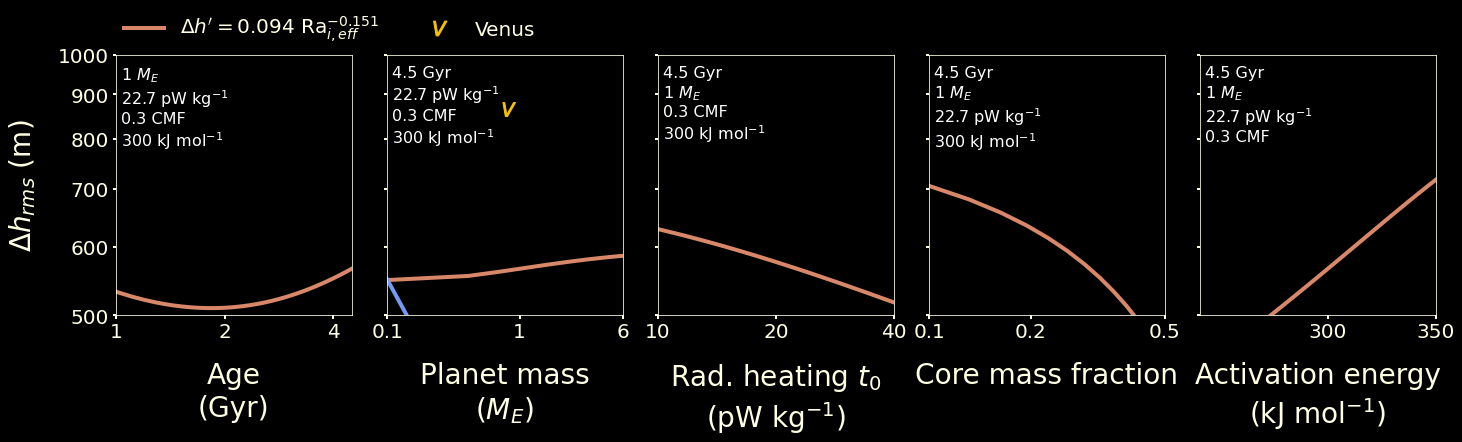

In [2]:
# how h varies across key input parameters
labelsize=28
legsize=20
xlabelpad=20
fig, axes = plottop.plot_h_relative_multi(age=4.5, alpha=1, wspace=0.15, legsize=16, 
                                          ticksize=20, labelsize=labelsize, fig_height=6,
                                        yset_ylim=False, legend=True, 
                                          lw=4, #legtitle=r'\textbf{\textit{Model}}', 
                                        ylabel='$\Delta h_{rms}$ (m)',
                                          nplanets=20, log=False,
                                          relative=False,
                                          labelpad=20, legendtop=True, tickwidth=2,
                                        save=False, fname='relative_h_slides', fig_path=fig_path,
                                        update_kwargs={'visc_type':'KW'},
                                          initial_kwargs = {'T_m0':1000, 'T_c0':3000},
                                        models=['dyn_top_rms',
                                                'dyn_top_heuristic'],
                                        labels=['Ra',
                                                'heuristic'],
        x_vars=['t', 'M_p',  'H_0', 'CMF','Ea'],
        units = ['Gyr', '$M_E$', 'pW kg$^{-1}$', 'CMF', 'kJ mol$^{-1}$'],
        x_range = [(1.5, 4.5), (0.1 * p.M_E, 6 * p.M_E), (10e-12, 40e-12),  (0.1, 0.7), (250e3, 350e3)],
                                          xscales = [p.sec2Gyr, p.M_E ** -1, 1e12,1, 1e-3],
 xlabels=['Age\n(Gyr)', 'Planet mass\n($M_E$)',  'Rad. heating $t_0$\n(pW kg$^{-1}$)', 
          'Core mass fraction', 'Activation energy\n(kJ mol$^{-1}$)'],
                                        c=['#d88868','#749af3'], textc='w' )

for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim((500, 1000))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
axes[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
axes[0].yaxis.set_minor_formatter(ticker.NullFormatter())
# axes[0].set_ylabel('$\Delta h_{rms}$ (m)', fontsize=labelsize, c='xkcd:off white')
axes[0].set_yticks([500, 600, 700, 800, 900, 1000])


# VENUS: 850 m
h_Venus = 865.4906656355711
M_Venus = 0.815

h_Mars = 6688.627942023225
M_Mars = 0.107

ax = axes[1]
# imscatter(M_Venus, h_Venus, planet_icon_path + 'Venus.png', zoom=0.04, ax=ax)
# imscatter(M_Mars, h_Mars, planet_icon_path + 'Mars.png', zoom=0.08, ax=ax)

ax.scatter(M_Venus, h_Venus, marker='$V$', c='xkcd:goldenrod', s=200, zorder=100)

# # Huang cases 1-13, 15
# h_Huang = np.array([200.15279436132423 , 688.2014927583677 , 673.7880493468331 , 402.07565967751117 , 695.2136989391211 , 672.4561163950626 , 214.12066607342535 , 488.4601789919337 , 878.5607285545191 , 292.43829959982384 , 311.3352436867767 , 339.3664129742059 , 640.1361418805931 , 430.1894190342128 ])
# for h in h_Huang:
#     ax.scatter(M_Venus, h, marker='^', s=70, alpha=0.5, c='xkcd:orchid', label=r'Huang+ (2013)', zorder=1)


handles =[mlines.Line2D([], [], color='#d88868', ls='-',
                                 markersize=0, lw=4, label='$\Delta h^\prime = 0.094$ Ra$_{i, eff}^{-0.151}$'),
#          mlines.Line2D([], [], color='#749af3', ls='-',
#                                  markersize=0, lw=4, label='h = f($\delta_{rh}, \Delta T_{rh}$)'),
                   mlines.Line2D([], [], color='xkcd:goldenrod', marker='$V$', 
                                 markersize=15, lw=0, label=r'Venus'),
#                    mlines.Line2D([], [], color='xkcd:orchid', marker='^', 
#                                  markersize=15, lw=0, label=r'Huang+ (2013) 3D model'),
         ]


legend = axes[0].legend(handles=handles, frameon=False, fontsize=legsize,
                   borderaxespad=0, 
                   loc='lower left', bbox_to_anchor=(0.0, 1.01), ncol=3, )

fig, *axes = dark_background(fig, axes)
i=0
axes[i].set_xlim((1, 4.5)) #age
axes[i].set_xticks([1, 2, 4])
i = i+1
axes[i].set_xlim((0.1, 6)) #mass
axes[i].set_xticks([0.1, 1, 6])
i = i+1
axes[i].set_xlim((10, 40)) #h0
axes[i].set_xticks([10, 20, 40])
i = i+1
axes[i].set_xlim((0.1, 0.5)) #cmf
axes[i].set_xticks([0.1, 0.2,0.5])
i = i+1
axes[i].set_xlim((250, 350)) #ea
axes[i].set_xticks([300, 350])



fig.savefig(fig_path+'h_parameters_slides'+fig_format)

In [ ]:
# how h varies across key input parameters

fig, axes = plottop.plot_h_relative_multi(age=4, alpha=1, wspace=0.15, legsize=23.5, ticksize=20, labelsize=28, 
                                        ymin=0.5, ymax=2, lw=4, #legtitle=r'\textbf{\textit{Model}}', 
                                        labelpad=10, legendtop=True, tickwidth=2,
                                        save=False, fname='relative_h_poster', fig_path=fig_path,
                                        visc_type='KW',
                                        models=['dyn_top_rms_isoviscous','dyn_top_KH'],
                                        labels=['$\Delta h_{\mathrm{RMS}}$ (Parsons \& Daly, 1983)',
                                                '$\Delta h_{\mathrm{peak}}$ (Kiefer \& Hager, 1992)'],
                                        x_vars=['t', 'M_p', 'CMF', 'H_0'],
                                        c=['#d88868','#749af3'])
